In [1]:
import numpy as np
import scipy.sparse as sparse
import scipy.linalg as linalg
import os
import pandas as pd
import click
import shutil
from heapq import merge

In [2]:
m = sparse.triu(sparse.load_npz('data/chr1_1_3000001.npz').T, format="csr")

In [3]:
from main import adjust_to_zero

In [4]:
m

<20609x20609 sparse matrix of type '<class 'numpy.float32'>'
	with 212375732 stored elements in Compressed Sparse Row format>

In [5]:
reduced = adjust_to_zero(m, .1)

In [6]:
reduced

<20609x20609 sparse matrix of type '<class 'numpy.float32'>'
	with 4293912 stored elements in Compressed Sparse Row format>

In [9]:
d = reduced.diagonal()

In [15]:
nonzeros = [np.count_nonzero(reduced.diagonal(i)) for i in range(reduced.shape[0])]


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

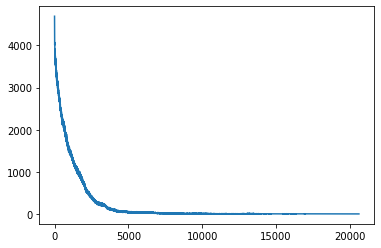

In [21]:
plt.plot(nonzeros[1:])

In [22]:
nonzeros[5000]

36

In [24]:
nonzeros[10000]

7

In [25]:
min(nonzeros)

0

In [27]:
np.log(reduced.shape[0])

9.933483152571508

In [28]:
nonzeros[8000]

6

In [37]:
np.argmin(np.array(nonzeros) > np.log(reduced.shape[0]) * 2)

5884

In [38]:
nonzeros[1]

4694

In [39]:
sum(nonzeros[5884:])

76285

In [40]:
sum(nonzeros[:5884])

4217627

In [41]:
# first index where num nonzeros is less than half of the length

In [42]:
nonzeros[2000]

727

In [43]:
nonzeros[1000]

1507

In [49]:
relative = nonzeros / np.arange(len(nonzeros))

/var/folders/dx/2gt9564n2mn92wk25_rrrns80000gn/T/ipykernel_65702/1219192581.py:1: RuntimeWarning: divide by zero encountered in true_divide
  relative = nonzeros / np.arange(len(nonzeros))


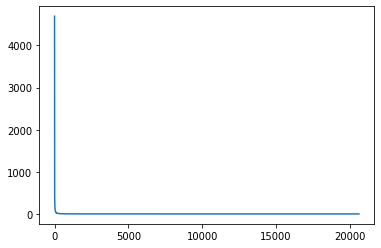

In [50]:
plt.plot(relative[1:])

In [59]:
np.argmax(relative < .5)

1748

In [60]:
relative[1748]

0.4959954233409611

In [61]:
relative[1747]

0.5163136805953062

In [62]:
nonzeros[1747]

902

In [67]:
np.argmin(relative > .5)

1710

In [65]:
relative[1709:1712]

array([0.51901697, 0.5       , 0.52776154])

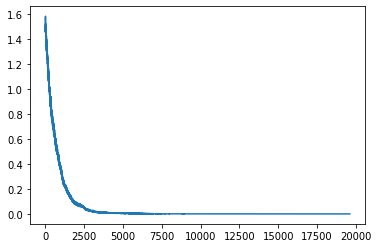

In [69]:
plt.plot(relative[1000:])

In [70]:
np.argmin(nonzeros)

8718

In [74]:
nonzeros[8711]

4

In [78]:
np.argmax(relative < .5)

1748